# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)   
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.  
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).  


1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей работает хуже, чем логистическая регрессия. 

2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

4. Сгенерировать датасет для задачи регрессии (MSE),
на котором решающее дерево работает хуже, чем линейная регрессия. 


In [1946]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

%matplotlib inline

In [1947]:
def report(alg_name, alg, X, y, mode):
    if mode == 'classification':
        score = np.mean(cross_val_score(alg, X, y, cv=5, scoring='accuracy'))
        print("%s: среднее значение accuracy для 5 фолдов - %s" % (alg_name, score))
    elif mode == 'regression':
        score = np.mean(cross_val_score(alg, X, y, cv=5, scoring='mean_squared_error'))
        print("%s: среднее значение MSE для 5 фолдов - %s" % (alg_name, score))

In [1948]:
def data_info(X, y, mode):
    plt.figure(figsize=(20,10))
    plt.title('Визуализация датасета')
    
    if mode == 'classification':
        counter = Counter(y)

        print('Количество объектов класса 0: %s' % (counter[0]))
        print('Количество объектов класса 1: %s' % (counter[1]))

        plt.scatter(np.transpose(X)[0], np.transpose(X)[1], c=y, s=30)
        plt.xlabel('feature 1', fontsize=16)
        plt.ylabel('feature 2', fontsize=16)
        
    elif mode == 'regression':
        plt.scatter(X, y, s=30)
        plt.xlabel('feature', fontsize=16)
        plt.ylabel('target value', fontsize=16)        
    
    plt.show()

## 1. Бинарная классификация: KNN < LogReg

In [1949]:
x1 = np.random.uniform(0.001, 10, (1000, 1))
x2 = np.random.randint(100, 100000, (1000, 1))

X1 = np.concatenate((x1, x2), axis=1)
y1 = []

for i in range(1000):
    if X1[i][0] < 4.5:
        y1.append(1)
    else:
        y1.append(0) 

Количество объектов класса 0: 534
Количество объектов класса 1: 466


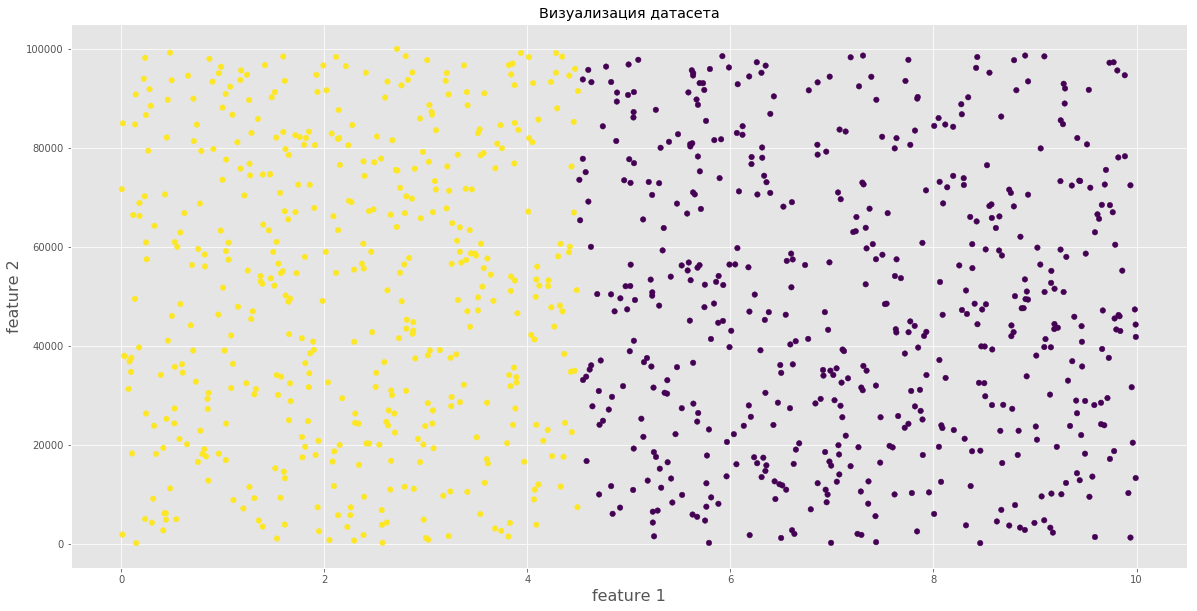

In [1950]:
data_info(X1, y1, 'classification')

#### KNN

In [1951]:
knn = KNeighborsClassifier()

report('KNeighborsClassifier', knn, X1, y1, 'classification')

KNeighborsClassifier: среднее значение accuracy для 5 фолдов - 0.49789987249681256


#### LogReg

In [1952]:
lr = LogisticRegression(random_state=1909)

report('LogisticRegression', lr, X1, y1, 'classification')

LogisticRegression: среднее значение accuracy для 5 фолдов - 0.9730147753693842


### Вывод

LogReg работает отлично, потому что:
* исходные данные линейно разделямы
* классы плюс-минус сбалансированы 

KNN работает так плохо (несмотря на то, что объекты четко разделены на два класса), потому что числовой разброс (т.е. дистанция между точками) в данных одного класса очень большой и признаки находятся как бы в разных масштабах, вследствие чего первый признак влияет на результат в разы больше, чем второй. Это можно доказать, просто отмасштабировав тот же самый датасет: результат получится намного лучше, близким к единице.

In [1953]:
X1_scaled = StandardScaler().fit_transform(X1)

report('KNeighborsClassifier', knn, X1_scaled, y1, 'classification')

KNeighborsClassifier: среднее значение accuracy для 5 фолдов - 0.9900099002475061


## 2. Бинарная классификация: KNN > LogReg

In [1954]:
x1 = np.random.uniform(0.1, 1, (1000, 1))
x2 = np.random.randint(1, 10, (1000, 1))

X2 = np.concatenate((x1, x2), axis=1)
y2 = []

for i in range(1000):
    if X2[i][1] % 2 == 0:
        y2.append(1)
    else:
        y2.append(0) 

Количество объектов класса 0: 579
Количество объектов класса 1: 421


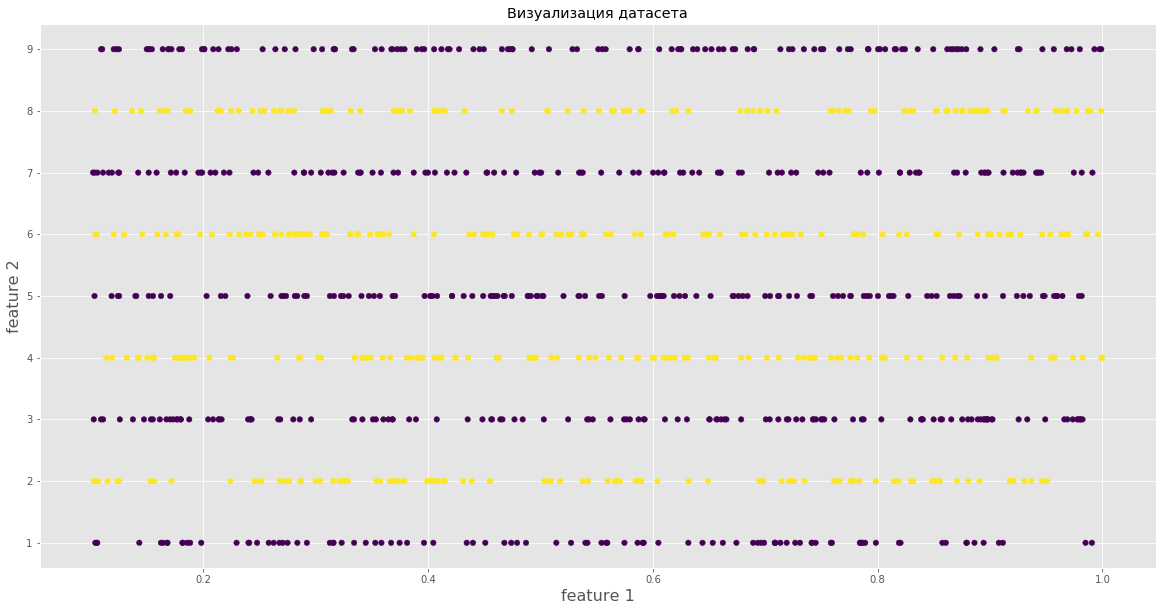

In [1955]:
data_info(X2, y2, 'classification')

#### KNN

In [1956]:
knn = KNeighborsClassifier()

report('KNeighborsClassifier', knn, X2, y2, 'classification')

KNeighborsClassifier: среднее значение accuracy для 5 фолдов - 1.0


#### LogReg

In [1957]:
lr = LogisticRegression(random_state=1909)

report('LogisticRegression', lr, X2, y2, 'classification')

LogisticRegression: среднее значение accuracy для 5 фолдов - 0.5790007750193755


### Вывод

Обратная ситуация: KNN хорош, потому что классы четко выделяются, признаки находятся в близких масштабах и расстояние между точками сравнительно небольшое. LogReg показывает низкое качество, потому что пространство признаков не является линейно разделяемым.

## 3. KNN Cosine > KNN Euclidean

In [1958]:
x1 = np.random.uniform(100, 100000, (1000, 1))
x2 = np.random.randint(1, 100, (1000, 1))

X3 = np.concatenate((x1, x2), axis=1)
y3 = []

for i in range(1000):
    if X3[i][0] / X3[i][1] < 1500:
        y3.append(1)
    else:
        y3.append(0)

Количество объектов класса 0: 358
Количество объектов класса 1: 642


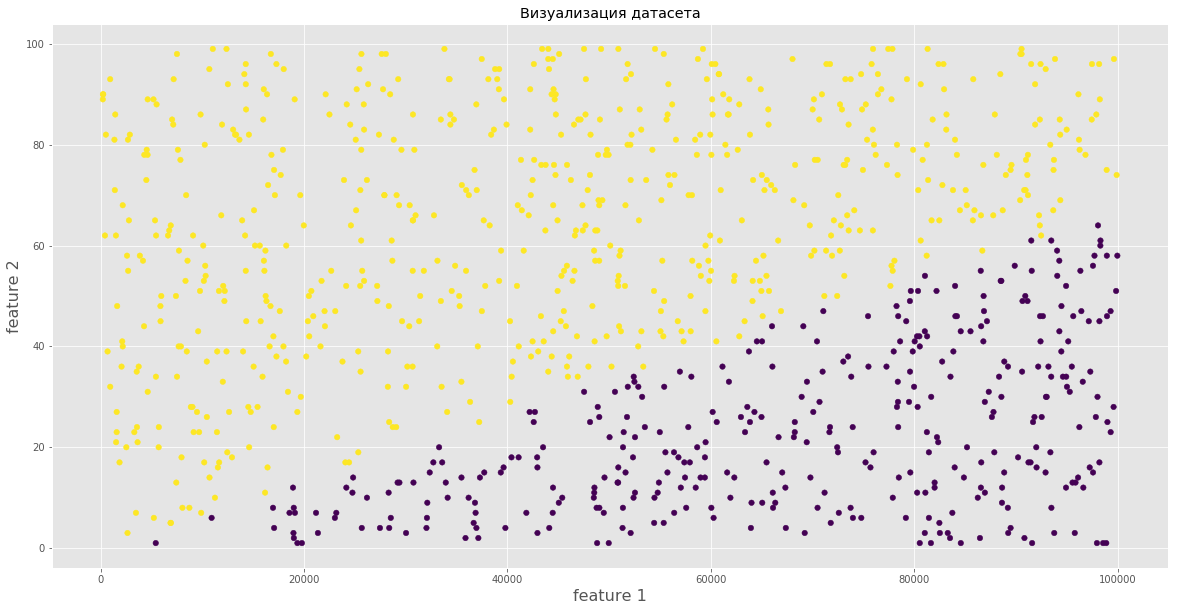

In [1959]:
data_info(X3, y3, 'classification')

#### KNN Cosine

In [1960]:
knn_cos = KNeighborsClassifier(metric='cosine')

report('KNeighborsClassifier Cosin', knn_cos, X3, y3, 'classification')

KNeighborsClassifier Cosin: среднее значение accuracy для 5 фолдов - 0.9979899497487438


#### KNN Euclidean

In [1961]:
knn_euc = KNeighborsClassifier(metric='euclidean')

report('KNeighborsClassifier Euclidean', knn_euc, X3, y3, 'classification')

KNeighborsClassifier Euclidean: среднее значение accuracy для 5 фолдов - 0.6789934998374959


### Вывод

Дело в разбросе значений первого признака и тем, как зависят признаки друг от друга. Проще всего будет объяснить по графику: возьмем три (примерные) точки, две из фиолетового класса, одну из желтого, и посчитаем на них эвклидово и косинусные расстояния.

In [1962]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity

a = [20000, 5] #фиолетовый класс
b = [10000, 10] #желтый класс
c = [40000, 20] #фиолетовый класс

print(cosine_similarity([a], [b])[0][0])
print(euclidean(a, b))

print(cosine_similarity([a], [c])[0][0])
print(euclidean(a, c))

0.9999997187502594
10000.001249999921
0.9999999687500094
20000.00562499921


Euclidean считает, что точки a и b cкорее относятся к одному классу, чем точки a и c, т.к. эвклидово расстояние между ними меньше. Cosine_similarity, наоборот, скорее отнесет к одному классу точки a и c, чем a и b, что соответствует реальному положению вещей.

## 4. DTR < LinReg

In [1963]:
X4 = np.random.uniform(0.1, 100, (1000, 1))
y4 = []

for i in range(1000):
    if X4[i] * 20 % 2 - 0.2 < 1:
        y4.append(X4[i] * 3)
    else:
        y4.append(X4[i] * 1)

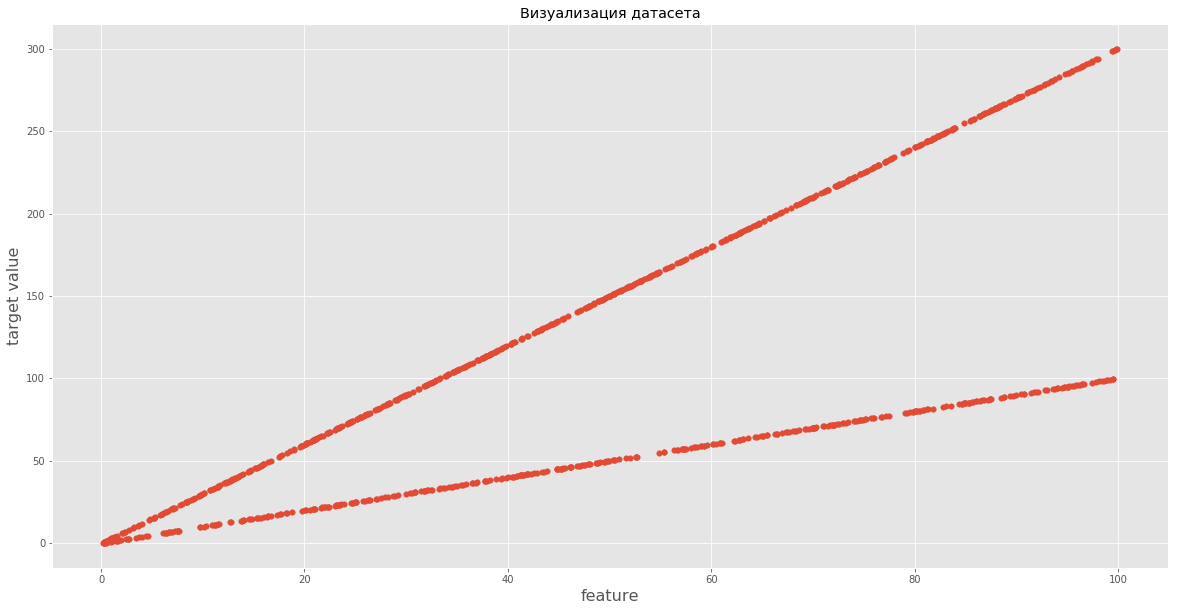

In [1964]:
data_info(X4, y4, 'regression')

#### DecisionTreeRegressor

In [1965]:
dtr = DecisionTreeRegressor(random_state=1909)

report('DecisionTreeRegressor', dtr, X4, y4, 'regression')

DecisionTreeRegressor: среднее значение MSE для 5 фолдов - -5959.771083581533


#### LinearRegression

In [1966]:
lr = LinearRegression()

report('LinearRegression', lr, X4, y4, 'regression')

LinearRegression: среднее значение MSE для 5 фолдов - -3114.76121998426


### Вывод

DTR работает плохо, потому что:

* сравнительно мало объектов в выборке
* возможно, переобучается (это частая проблема у решающих деревьев)
* кажется, что слишком сложное условие X4[i] * 20 % 2 - 0.2 < 1: если заменить его чем-то простым типа X4[i] % 2 == 0, модель дает очень низкий MSE.


LinReg работает лучше, потому что:
* данные имеют linear shape

Но все еще не очень, потому что:
* зависимость y[i] от X[i] можно выразить в виде системы линейных уравнений, линрег с ней не справляется

Еще одна важная особенность: DTR ломается, если данные для теста выходят за range данных, использовавшихся для обучения. Для бОльших значений X дерево будет просто предсказывать значения, близкие к самому большому значению из тех, которое он знает, тогда как линрег будет дальше идти по линейной функции. Это можно доказать быстрым экспериментом.

In [1967]:
dtr = dtr.fit(X4, y4)
lr = lr.fit(X4, y4)

In [1968]:
#значения X крупнее использовавшихся для обучения
X_test = np.random.uniform(100, 1000, (1000, 1))
y_test = []

for i in range(1000):
    if X_test[i] * 20 % 2 - 0.2 < 1:
        y_test.append(X_test[i] * 3)
    else:
        y_test.append(X_test[i] * 1)

In [1969]:
y_pred_dtr = dtr.predict(X_test)
y_pred_lr = lr.predict(X_test)

print('MSE для DTR: %s' % (MSE(y_test, y_pred_dtr)))
print('MSE для LR: %s' % (MSE(y_test, y_pred_lr)))

MSE для DTR: 1616963.6555182815
MSE для LR: 369106.3172342292


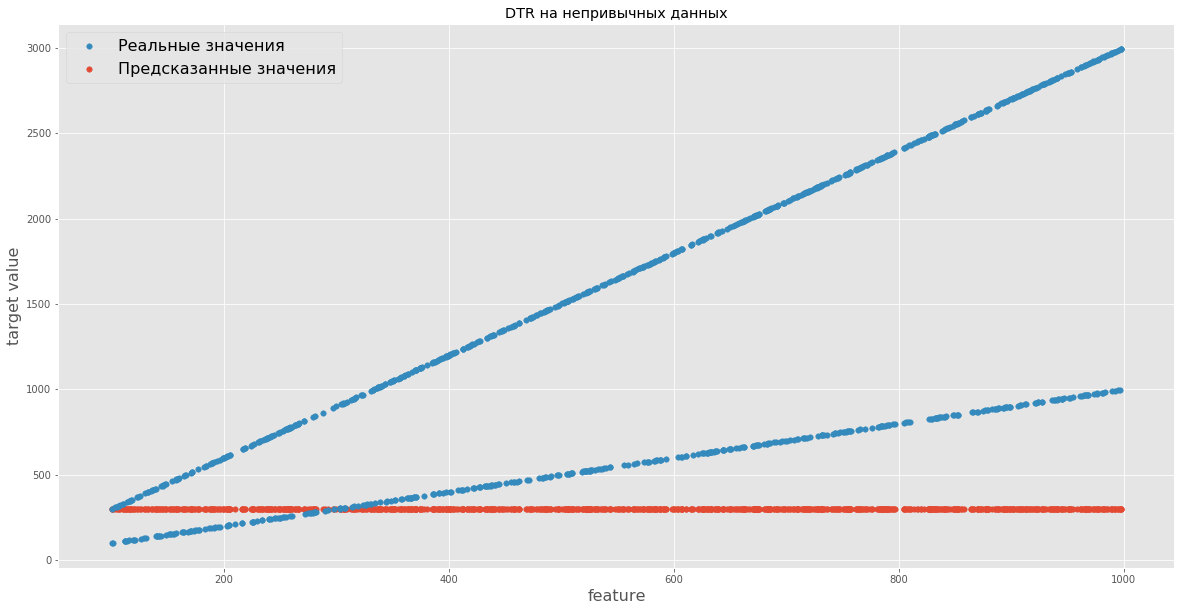

In [1970]:
plt.figure(figsize=(20,10))
plt.title('DTR на непривычных данных')

a = plt.scatter(X_test, y_pred_dtr, s=30)
b = plt.scatter(X_test, y_test, s=30)

plt.legend((b, a), ('Реальные значения', 'Предсказанные значения'), fontsize=16)

plt.xlabel('feature', fontsize=16)
plt.ylabel('target value', fontsize=16)

plt.show()

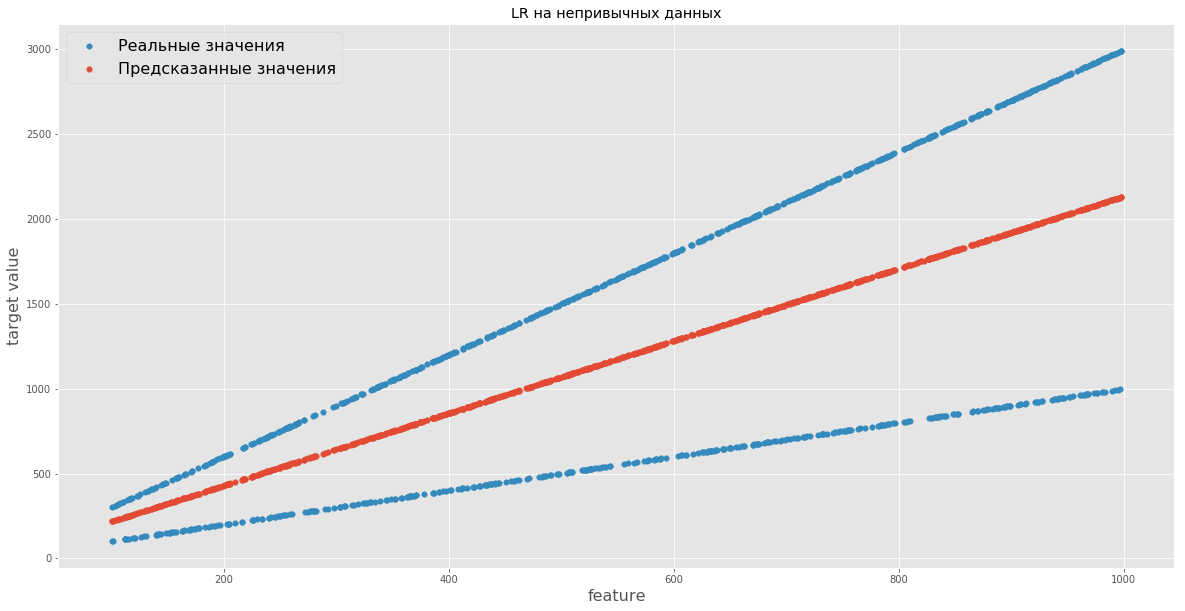

In [1971]:
plt.figure(figsize=(20,10))
plt.title('LR на непривычных данных')

a = plt.scatter(X_test, y_pred_lr, s=30)
b = plt.scatter(X_test, y_test, s=30)

plt.legend((b, a), ('Реальные значения', 'Предсказанные значения'), fontsize=16)
plt.xlabel('feature', fontsize=16)
plt.ylabel('target value', fontsize=16)

plt.show()